<a href="https://colab.research.google.com/github/rjarun8/MLOPS/blob/main/Machine_Learning_Linear_Regression_Custom_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate Data

In [ ]:
#y = 3.5X + noise

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


SEED=42
NUM_SAMPLES=100

#set seed
np.random.seed(SEED)

def generated_data(NUM_SAMPLES):
  X = np.array(range(NUM_SAMPLES))
  random_noise = np.random.uniform(-10,20,size=NUM_SAMPLES)
  y = 3.5*X + random_noise
  return (X,y)

In [ ]:
X , y = generated_data(NUM_SAMPLES)
data = np.vstack([X,y]).T
print(data.shape)
print(X[98:],y[98:])


(100, 2)
[98 99] [333.7625738  339.73674281]


In [ ]:
#load data into pandas dataframe
df = pd.DataFrame(data,columns=['X','y'])
X=df[['X']].values
y=df[['y']].values
df.head(3)

,X,y
0,0.0,1.236204
1,1.0,22.021429
2,2.0,18.959818


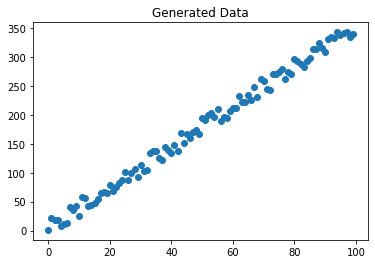

In [ ]:
plt.title('Generated Data')
plt.scatter(x=X,y=y)
plt.show()

In [ ]:
TRAIN_SIZE = 0.85
TEST_SIZE = 0.05
VAL_SIZE = 0.10
#shuffle data
indices = list(range(NUM_SAMPLES))
indces = np.random.shuffle(indices)
X = X[indices]
y = y[indices]

#data split

train_start = 0
train_end = int(TRAIN_SIZE*NUM_SAMPLES)
val_start = train_end
val_end = int(VAL_SIZE*NUM_SAMPLES) + val_start
test_start = val_end

X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]

print('Train Shape :',X_train.shape , y_train.shape)
print('Val Shape :',X_val.shape , y_val.shape)
print('Test Shape :',X_test.shape , y_test.shape)

Train Shape : (85, 1) (85, 1)
Val Shape : (10, 1) (10, 1)
Test Shape : (5, 1) (5, 1)


Standardize Data

x-mean/sd

In [ ]:
def standardize(data,mean,sd):
  return (data-mean)/sd

In [ ]:
X_train_mean = np.mean(X_train)
y_train_mean = np.mean(y_train)
X_train_sd = np.std(X_train)
y_train_sd = np.std(y_train)

In [ ]:
X_train =  standardize(X_train,X_train_mean,X_train_sd)
y_train = standardize(y_train,y_train_mean,y_train_sd)
X_val = standardize(X_val,X_train_mean,X_train_sd)
y_val = standardize(y_val,y_train_mean,y_train_sd)
X_test = standardize(X_test,X_train_mean,X_train_sd)
y_test = standardize(y_test,y_train_mean,y_train_sd)

In [ ]:
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = y_train.shape[1]

Initializing weghts and bias

In [ ]:
wt = np.random.randn(INPUT_DIM,OUTPUT_DIM)*0.01
bias = np.zeros((1,1))
print('wt.shape', wt.shape)
print('b.shape', bias.shape)

wt.shape (1, 1)
b.shape (1, 1)


Building Model

In [ ]:
y_pred = np.dot(X_train , wt) + bias
print('predicted.shape :' , y_pred.shape)

predicted.shape : (85, 1)


Create Loss function

In [ ]:
# Loss
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred)**2)
print (f"loss: {loss:.2f}")


loss: 1.00


Gradient Calculation

In [ ]:
# Backpropagation
djW = -(2/N) * np.sum((y_train - y_pred) * X_train)
djb = -(2/N) * np.sum((y_train - y_pred) * 1)


In [ ]:
LR = 1e-1
print('learning rate ', LR)

learning rate  0.1


In [ ]:
wt += -(LR * djW)
bias += -(LR*djb)

In [ ]:
NUM_EPOCHS = 1000

W = np.random.randn(INPUT_DIM,OUTPUT_DIM)*0.01
B = np.zeros((1,))

#Training Loop

for epoch_num in range(NUM_EPOCHS):

  #Forward Pass
  y_pred = np.dot(X_train,W) + B

  loss = (1/N) * np.sum((y_train - y_pred)**2)

  if epoch_num%10 == 0:
    print(f'weights {W} ,  bias {B}')
    print(f'epoch num {epoch_num} , loss {loss}')

  # Backpropagation
  djW = -(2/N) * np.sum((y_train - y_pred) * X_train)
  djb = -(2/N) * np.sum((y_train - y_pred) * 1)

  #update weights and bias

  W += -(LR * djW)
  B += -(LR*djb)


  

weights [[0.00617004]] ,  bias [0.]
epoch num 0 , loss 0.987745359478084
weights [[0.8898621]] ,  bias [1.50206645e-16]
epoch num 10 , loss 0.01896157484130793
weights [[0.98474782]] ,  bias [1.64051779e-16]
epoch num 20 , loss 0.007792258255086439
weights [[0.99493609]] ,  bias [1.642477e-16]
epoch num 30 , loss 0.007663484802246274
weights [[0.99603005]] ,  bias [1.62092562e-16]
epoch num 40 , loss 0.007662000145416256
weights [[0.99614751]] ,  bias [1.67186526e-16]
epoch num 50 , loss 0.007661983028488392
weights [[0.99616012]] ,  bias [1.61961947e-16]
epoch num 60 , loss 0.007661982831143652
weights [[0.99616148]] ,  bias [1.67708984e-16]
epoch num 70 , loss 0.0076619828288684196
weights [[0.99616162]] ,  bias [1.63529321e-16]
epoch num 80 , loss 0.0076619828288421905
weights [[0.99616164]] ,  bias [1.63268092e-16]
epoch num 90 , loss 0.007661982828841885
weights [[0.99616164]] ,  bias [1.63464014e-16]
epoch num 100 , loss 0.007661982828841883
weights [[0.99616164]] ,  bias [1.6535

Evaluation

In [ ]:
pred_train = W*X_train+B
pred_val = W*X_val + B

MSE

In [ ]:
train_mse = np.mean((y_train - pred_train)**2 )
val_mse = np.mean((y_val - pred_val)**2)

print(f'train MSE {train_mse:.2f} and Val MSE {val_mse:.2f}')

train MSE 0.01 and Val MSE 0.01


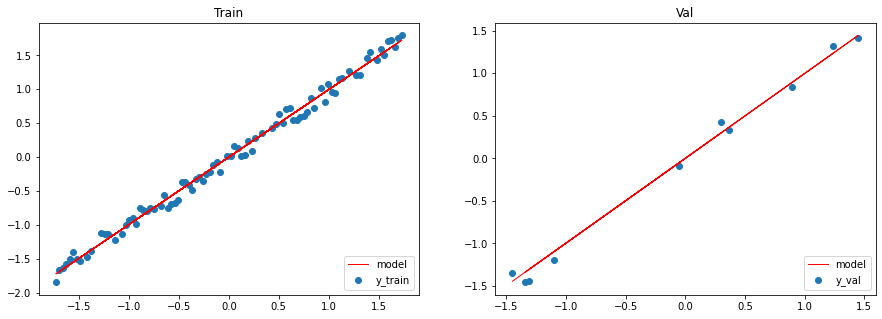

In [ ]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label='y_train')
plt.plot(X_train, pred_train, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Val")
plt.scatter(X_val, y_val, label='y_val')
plt.plot(X_val, pred_val, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Show plots
plt.show()


Unscale weights to get the true weights

In [ ]:
# Unscaled weights
W_unscaled = W * (y_train_sd/X_train_sd)
b_unscaled = B * y_train_sd + y_train_mean - np.sum(W_unscaled*X_train_mean)
print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0]:.1f}")


[actual] y = 3.5X + noise
[model] y_hat = 3.5X + 4.2


In [ ]:
X = 99
y_hat = 3.5*X + 4.2
print(y_hat)
# [98 99] [351.68671427 339.06042395]

350.7


PyTorch Implementation

In [ ]:
import torch
torch.manual_seed(42)

In [ ]:
from sklearn.model_selection import train_test_split

TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

# Split (train)
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE)


print (f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
       f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")


print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")


train: 70 (0.70)
remaining: 30 (0.30)
train: 70 (0.70)
val: 10 (0.10)
test: 5 (0.05)


In [ ]:
X_val.shape

(10, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Apply scaler on training and test data
X_train = X_scaler.transform(X_train)
y_train = y_scaler.transform(y_train).ravel().reshape(-1, 1)
X_val = X_scaler.transform(X_val)
y_val = y_scaler.transform(y_val).ravel().reshape(-1, 1)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test).ravel().reshape(-1, 1)

In [ ]:
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")


mean: -1.7, std: 0.0
mean: -1.7, std: 0.0


In [ ]:
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = y_train.shape[1]

In [ ]:
from torch import nn
N=3
x = torch.randn(N,INPUT_DIM)
print(x.shape)
print(x.numpy())

torch.Size([3, 1])
[[0.33669037]
 [0.1288094 ]
 [0.23446237]]


In [ ]:
#weights
m = nn.Linear(INPUT_DIM,OUTPUT_DIM)
print(m)

Linear(in_features=1, out_features=1, bias=True)


In [ ]:
print ('weight :', m.weight[0][0].detach().numpy() )
print ('bias :', m.bias[0].detach().numpy())

weight : 0.8815429
bias : -0.73362815


In [ ]:
#forward pass
z = m(x)
print(z.detach().numpy())
print(z.shape)

[[-0.43682113]
 [-0.62007713]
 [-0.5269395 ]]
torch.Size([3, 1])


In [ ]:
class LR(nn.Module):

  def __init__(self,INPUT_DIM,OUTPUT_DIM):
    super(LR,self).__init__()
    self.fc1 = nn.Linear(INPUT_DIM,OUTPUT_DIM)

  def forward(self, xin):
    y_pred = self.fc1(xin)
    return y_pred

In [ ]:
#initialize model

model = LR(INPUT_DIM=INPUT_DIM, OUTPUT_DIM=OUTPUT_DIM)
print(model.named_parameters)

<bound method Module.named_parameters of LR(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)>


In [ ]:
loss_fn = nn.MSELoss()
y_pred = torch.Tensor([0,0,1,1])
y_true = torch.Tensor([1,1,1,1])
loss = loss_fn(y_pred,y_true)
print('loss :', loss.numpy())

loss : 0.5


In [ ]:
from torch.optim import Adam
# Optimizer
optimizer = Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
for i in (model.parameters()):
  print(i)

Parameter containing:
tensor([[0.7388]], requires_grad=True)
Parameter containing:
tensor([0.1354], requires_grad=True)


In [ ]:
L_R = 0.01
optimizer = Adam(model.parameters(), lr=L_R)

In [ ]:
# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)


In [ ]:
NUM_EPOCHS = 100
for epochs in range(NUM_EPOCHS):

  y_pred = model(X_train)

  loss = loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  if epochs%20==0:
        print (f"Epoch: {epochs} | loss: {loss:.2f}")

Epoch: 0 | loss: 0.03
Epoch: 20 | loss: 0.01
Epoch: 40 | loss: 0.01
Epoch: 60 | loss: 0.01
Epoch: 80 | loss: 0.01


In [ ]:
# Predictions
pred_train = model(X_train)
pred_test = model(X_test)


# Performance
train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)
print(f'train_error: {train_error:.2f}')
print(f'test_error: {test_error:.2f}')


train_error: 0.01
test_error: 0.00


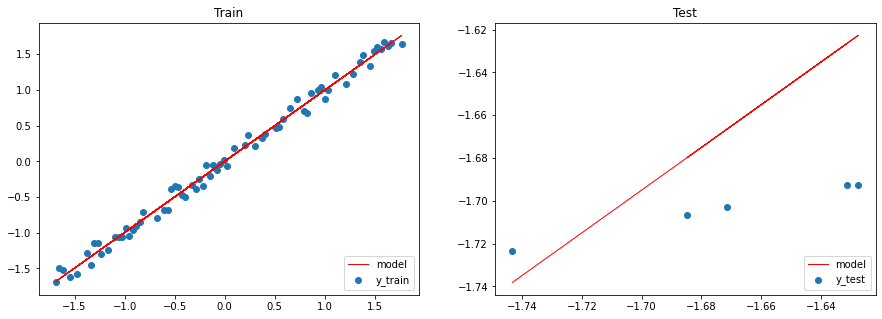

In [ ]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label='y_train')
plt.plot(X_train, pred_train.detach().numpy(), color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test.detach().numpy(), color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Show plots
plt.show()


In [ ]:
# Feed in your own inputs
sample_indices = [10, 15, 25]
X_infer = np.array(sample_indices, dtype=np.float32)
X_infer = torch.Tensor(X_scaler.transform(X_infer.reshape(-1, 1)))


In [ ]:
# Unstandardize predictions
pred_infer = model(X_infer).detach().numpy() * np.sqrt(y_scaler.var_) + y_scaler.mean_
for i, index in enumerate(sample_indices):
    print (f"{df.iloc[index]['y']:.2f} (actual) → {pred_infer[i][0]:.2f} (predicted)")


25.62 (actual) → 37.99 (predicted)
48.00 (actual) → 55.64 (predicted)
101.06 (actual) → 90.92 (predicted)


In [ ]:
# Unstandardize coefficients
W = model.fc1.weight.data.numpy()[0][0]
b = model.fc1.bias.data.numpy()[0]
W_unscaled = W * (y_scaler.scale_/X_scaler.scale_)
b_unscaled = b * y_scaler.scale_ + y_scaler.mean_ - np.sum(W_unscaled*X_scaler.mean_)
print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0]:.1f}X + {b_unscaled[0]:.1f}")


[actual] y = 3.5X + noise
[model] y_hat = 3.5X + 2.7


In [ ]:
L2_LAMBDA = 1e-2

model = LR(INPUT_DIM = INPUT_DIM , OUTPUT_DIM = OUTPUT_DIM)
optimizer = Adam(model.parameters() , lr=L_R, weight_decay= L2_LAMBDA)

In [ ]:
# Training
for epoch in range(NUM_EPOCHS):
    # Forward pass
    y_pred = model(X_train)

    # Loss
    loss = loss_fn(y_pred, y_train)

    # Zero all gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if epoch%20==0:
        print (f"Epoch: {epoch} | loss: {loss:.2f}")


Epoch: 0 | loss: 0.08
Epoch: 20 | loss: 0.01
Epoch: 40 | loss: 0.01
Epoch: 60 | loss: 0.01
Epoch: 80 | loss: 0.01


In [ ]:
# Predictions
pred_train = model(X_train)
pred_test = model(X_test)


In [ ]:
# Performance
train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)
print(f'train_error: {train_error:.2f}')
print(f'test_error: {test_error:.2f}')


train_error: 0.01
test_error: 0.00
